In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
PATH = './CleanData/parallel/parallel_new/'
FREQ = 100
data_files = os.listdir(PATH)
print(data_files)
cols_to_map = [' Fx',' Fy',' Fz',' Tx',' Ty',' Tz']
demos_crk = []
demos_peno = []
demos_pvc = []
def check_and_sort_materials(df_name):
    df = pd.read_csv(df_name)
    for c in cols_to_map:
        df[c] = df[c]/-20

    if 'corck' in df_name:
        demos_crk.append(df)
    elif 'peno' in df_name:
        demos_peno.append(df)
    else:
        demos_pvc.append(df)
demonstrations = []
for name in data_files:
    if name.endswith('.csv'):
        check_and_sort_materials(PATH+name)
        demonstrations.append(pd.read_csv(PATH+name))
print(len(demonstrations))
target_length = min([len(df) for df in demonstrations])

def get_velocities(df0, time_interval = 1/FREQ):
    df = df0.copy()

    # Calculate velocity components
    df['vx'] = df['X'].diff() / time_interval
    df['vy'] = df['Y'].diff() / time_interval
    df['vz'] = df['Z'].diff() / time_interval
    dx,dy,dz = df['vx'][1], df['vy'][1], df['vz'][1]
    df['vx'].fillna(dx, inplace=True)
    df['vy'].fillna(dy, inplace=True)
    df['vz'].fillna(dz, inplace=True)
    # df['vx'] = df['vx'].dropna()
    # df['vy'].dropna()
    # df['vz'].dropna()
    df['wx'] = df['R_x'].diff() / time_interval
    df['wy'] = df['R_y'].diff() / time_interval
    df['wz'] = df['R_z'].diff() / time_interval
    dwx, dwy, dwz = df['wx'][1], df['wy'][1], df['wz'][1]
    df['wx'].fillna(dwx, inplace=True)
    df['wy'].fillna(dwy, inplace=True)
    df['wz'].fillna(dwz, inplace=True)

    return df
def scale_column_to_0_60(column):
    N_min, N_max = 0, 60
    X_min, X_max = column.min(), column.max()
    return (column - X_min) * (N_max - N_min) / (X_max - X_min) + N_min

cols_to_keep = ['X', 'Y','Z', 'R_x','R_y','R_z',' Fx',' Fy',' Fz',' Tx',' Ty',' Tz']
min_length = min(df.shape[0] for df in demonstrations)
demos= [df[cols_to_keep][:min_length] for df in demonstrations]

demos_with_vel = [get_velocities(d) for d in demos]
demos_crk_vel = [get_velocities(d) for d in demos_crk]
demos_peno_vel = [get_velocities(d) for d in demos_peno]
demos_pvc_vel = [get_velocities(d) for d in demos_pvc]
cols_to_keep_with_vel = ['X', 'Y','Z', 'R_x','R_y','R_z',' Fx',' Fy',' Fz',' Tx',' Ty',' Tz', 'vx', 'vy', 'vz', 'wx', 'wy', 'wz' ]
demos_crk_vel_aln = [df[cols_to_keep_with_vel][:min_length] for df in demos_crk_vel]
demos_peno_vel_aln = [df[cols_to_keep_with_vel][:min_length] for df in demos_peno_vel]
demos_pvc_vel_aln = [df[cols_to_keep_with_vel][:min_length] for df in demos_pvc_vel]
X = np.array(demos_with_vel)
X_crk = np.array(demos_crk_vel_aln) #(35,300,12)
X_peno = np.array(demos_peno_vel_aln) #(26,300,12)
X_pvc = np.array(demos_pvc_vel_aln) #(35,300,12)
X.shape

['corck_parallel_iter1.csv', 'corck_parallel_iter10.csv', 'corck_parallel_iter11.csv', 'corck_parallel_iter12.csv', 'corck_parallel_iter13.csv', 'corck_parallel_iter14.csv', 'corck_parallel_iter15.csv', 'corck_parallel_iter16.csv', 'corck_parallel_iter17.csv', 'corck_parallel_iter18.csv', 'corck_parallel_iter19.csv', 'corck_parallel_iter2.csv', 'corck_parallel_iter20.csv', 'corck_parallel_iter21.csv', 'corck_parallel_iter22.csv', 'corck_parallel_iter23.csv', 'corck_parallel_iter24.csv', 'corck_parallel_iter25.csv', 'corck_parallel_iter26.csv', 'corck_parallel_iter27.csv', 'corck_parallel_iter28.csv', 'corck_parallel_iter29.csv', 'corck_parallel_iter3.csv', 'corck_parallel_iter30.csv', 'corck_parallel_iter31.csv', 'corck_parallel_iter32.csv', 'corck_parallel_iter33.csv', 'corck_parallel_iter34.csv', 'corck_parallel_iter35.csv', 'corck_parallel_iter4.csv', 'corck_parallel_iter5.csv', 'corck_parallel_iter6.csv', 'corck_parallel_iter7.csv', 'corck_parallel_iter8.csv', 'corck_parallel_iter9

C:\Users\wadda\AppData\Local\Temp\ipykernel_8580\3647925116.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['vx'].fillna(dx, inplace=True)
C:\Users\wadda\AppData\Local\Temp\ipykernel_8580\3647925116.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doin

(96, 300, 18)

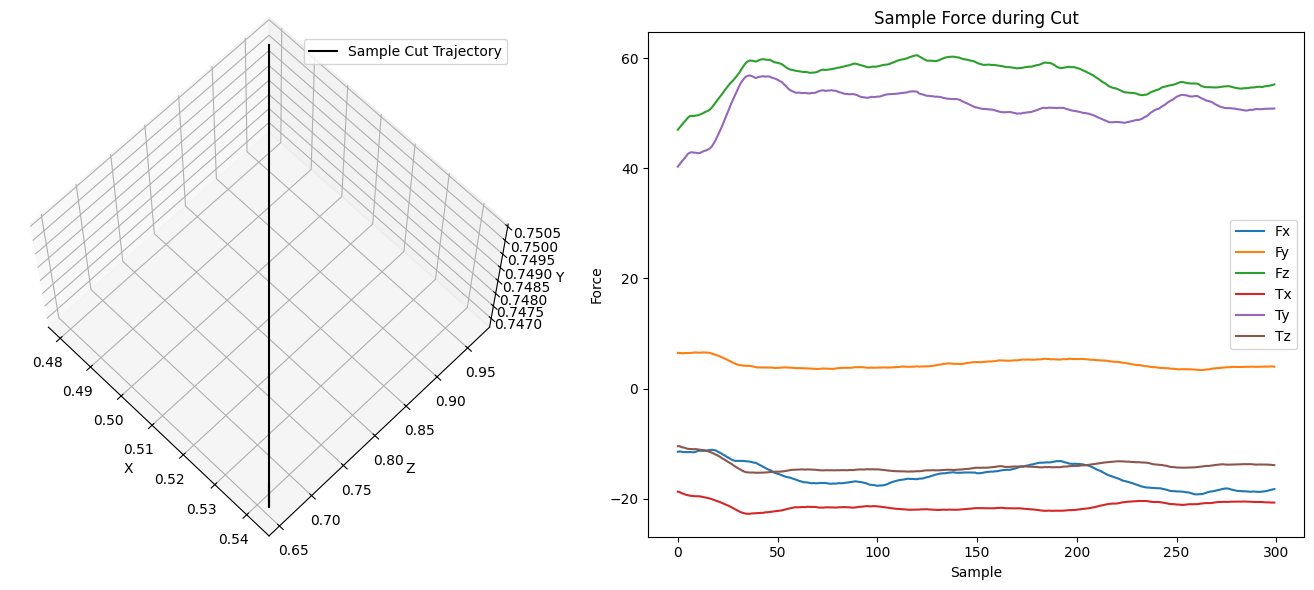

In [2]:
def get_sample_for_vis(X, demo_idx):
    X_idx, Y_idx ,Z_idx =0,1, 2
    R_x_idx, R_y_idx, R_z_idx =3,4, 5
    Fx_idx, Fy_idx, Fz_idx =6,7, 8
    Tx_idx,Ty_idx,Tz_idx =9,10, 11
    vx_idx, vy_idx, vz_idx = 12, 13, 14
    wx_idx, wy_idx, wz_idx = 15,16, 17
    x, y, z = X[demo_idx][:,X_idx], X[demo_idx][:,Y_idx], X[demo_idx][:,Z_idx]
    Fx, Fy, Fz = X[demo_idx][:,Fx_idx], X[demo_idx][:,Fy_idx], X[demo_idx][:,Fz_idx]
    Tx, Ty, Tz = X[demo_idx][:,Tx_idx], X[demo_idx][:,Ty_idx], X[demo_idx][:,Tz_idx]
    return x, y, z, Fx, Fy, Fz, Tx, Ty, Tz



demo_index = 11  # Third cut
x, y, z, Fx, Fy, Fz, Tx, Ty, Tz = get_sample_for_vis(X_crk, demo_index)
# Plotting trajectory
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot(x,z, y, label=f'Sample Cut Trajectory', color='k')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.legend()
ax.view_init(elev=65, azim=-45)

# Plotting forces
ax2 = fig.add_subplot(122)
ax2.plot(Fx, label='Fx')
ax2.plot(Fy, label='Fy')
ax2.plot(Fz, label='Fz')
ax2.plot(Tx, label='Tx')
ax2.plot(Ty, label='Ty')
ax2.plot(Tz, label='Tz')
ax2.set_xlabel('Sample')
ax2.set_ylabel('Force')
ax2.legend()
ax2.set_title('Sample Force during Cut')

plt.tight_layout()
plt.show()


### Generating demonstrations

In [3]:
def add_material_label(X, label):
    # Create an array of ones with the desired shape (35, 300, 1)
    n_demos, n_samples, n_features = X.shape
    ones_column = label * np.ones((n_demos, n_samples, 1))

    # Concatenate the array of ones to the original array along the last dimension
    X_extended = np.concatenate((ones_column, X ), axis=2)
    return X_extended
X_crk_labeled = add_material_label(X_crk, 1)
x_peno_labeled = add_material_label(X_peno, 2)
x_pvc_labeled = add_material_label(X_pvc, 3)
print(X_crk_labeled.shape)
print(x_peno_labeled.shape)
print(x_pvc_labeled.shape)

(35, 300, 19)
(26, 300, 19)
(35, 300, 19)


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import BayesianGaussianMixture, GaussianMixture
from itertools import cycle
from gmr import GMM, kmeansplusplus_initialization, covariance_initialization
from gmr.utils import check_random_state

from bgmm_extended import BGMM
from gmm_extended import GMM_EXTENDED

random_state = check_random_state(42)
n_components = 50
tol=1e-5
max_iter = 1000
plot_covariances = False

X = np.concatenate((X_crk_labeled, x_peno_labeled, x_pvc_labeled), axis=0)

n_demonstrations, n_steps, n_task_dims = X.shape

X_train = np.empty((n_demonstrations, n_steps, n_task_dims + 1))
X_train[:, :, 1:] = X
t = np.linspace(0, 1, n_steps)
X_train[:, :, 0] = t
X_train = X_train.reshape(n_demonstrations * n_steps, n_task_dims + 1)


initial_means = kmeansplusplus_initialization(X_train, n_components, random_state)
initial_covs = covariance_initialization(X_train, n_components)
bgmm = GMM_EXTENDED(n_components=n_components, max_iter=max_iter, verbose=2,tol=tol, init_params='k-means++').fit(X_train)

Initialization 0
  Iteration 10	 time lapse 9.25969s	 ll change 1.21572
  Iteration 20	 time lapse 24.39940s	 ll change 0.06315
  Iteration 30	 time lapse 21.22924s	 ll change 0.01807
  Iteration 40	 time lapse 23.88749s	 ll change 0.00231
  Iteration 50	 time lapse 23.24672s	 ll change 0.00579
  Iteration 60	 time lapse 20.74195s	 ll change 0.00102
  Iteration 70	 time lapse 20.97232s	 ll change 0.00017
  Iteration 80	 time lapse 20.36275s	 ll change 0.00045
  Iteration 90	 time lapse 18.13232s	 ll change 0.00005
Initialization converged: True	 time lapse 187.21750s	 ll -3.74217


Text(0.5, 1.0, 'Covergence of gmm-gmr model parameters to fit trajectory-wrench data profile')

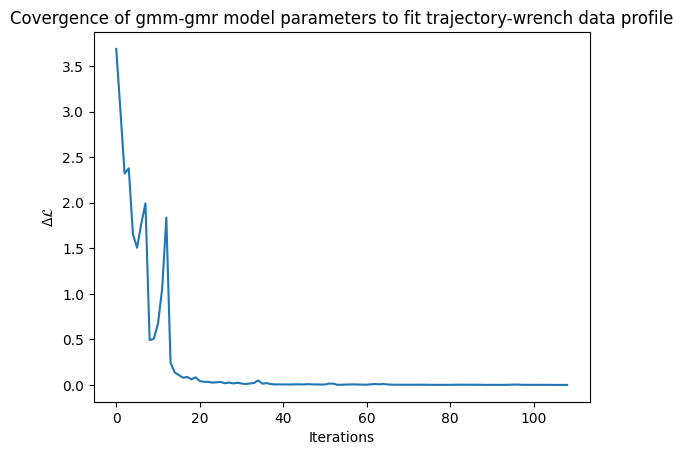

In [20]:
plt.plot(bgmm.dlog_history[2:])
plt.xlabel('Iterations')
plt.ylabel('$\Delta \mathcal{L}$')
plt.title('Covergence of gmm-gmr model parameters to fit trajectory-wrench data profile')

Text(0.5, 1.0, 'Covergence of gmm-gmr model parameters to fit trajectory-wrench data profile')

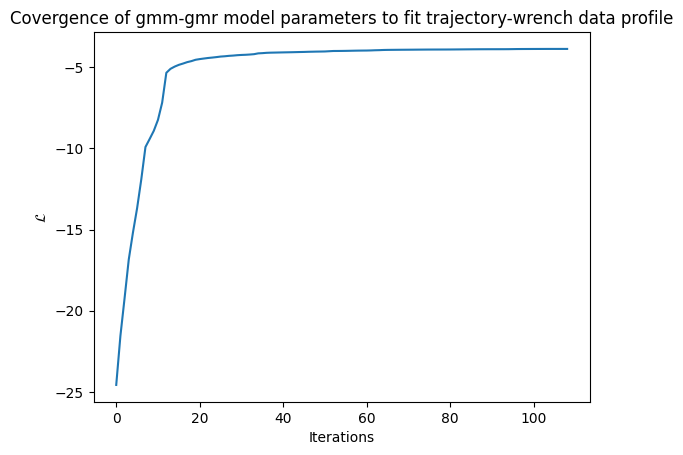

In [21]:
plt.plot(bgmm.log_history[2:])
plt.xlabel('Iterations')
plt.ylabel('$\mathcal{L}$')
plt.title('Covergence of gmm-gmr model parameters to fit trajectory-wrench data profile')

In [7]:
print(bgmm.log_resp[-1][-1,:])

[-2.00063773e+06 -1.99623998e-03 -8.88364546e+03 -8.02720288e+04
 -1.71646156e+02 -2.00431000e+06 -1.11762392e+04 -5.01019342e+05
 -1.96733269e+03 -5.01354375e+05 -1.94653062e+09 -6.21748791e+00
 -5.39688572e+03 -1.72817044e+03 -2.24004091e+02 -1.12212819e+03
 -5.01061175e+05 -3.10776445e+02 -5.96616931e+02 -5.59997810e+03
 -2.79315229e+04 -2.05747524e+03 -5.01812394e+05 -2.00520536e+06
 -2.44848774e+09 -3.21194474e+03 -8.61856215e+01 -2.00044539e+06
 -1.24750336e+04 -2.00833488e+06 -4.54491983e+02 -1.25536029e+03
 -1.26870185e+03 -2.73190656e+03 -1.80780432e+03 -1.07978234e+04
 -2.25924477e+01 -1.94653096e+09 -5.00836549e+05 -2.74074337e+06
 -6.04775406e+05 -4.02199860e+02 -2.00116620e+06 -2.00070794e+06
 -5.00583958e+05 -4.56635385e+02 -5.01471605e+05 -3.52789571e+01
 -4.07094216e+02 -1.47035171e+02]


Text(0.5, 1.0, 'log-liklihood maximization of gmm-gmr model parameters to fit trajectory-wrench data profile')

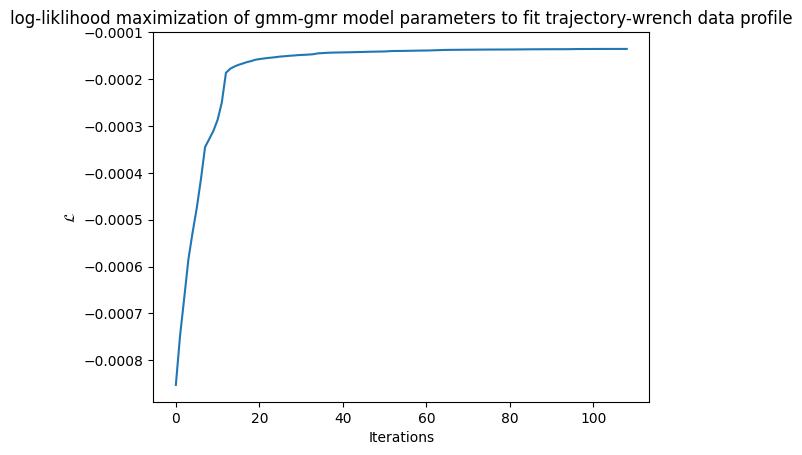

In [23]:
plt.plot(bgmm.llog_hist[2:])
plt.xlabel('Iterations')
plt.ylabel(r'$\mathcal{L}$')
plt.title('log-liklihood maximization of gmm-gmr model parameters to fit trajectory-wrench data profile')

In [9]:
print(bgmm.scaler)

28800


### Inference

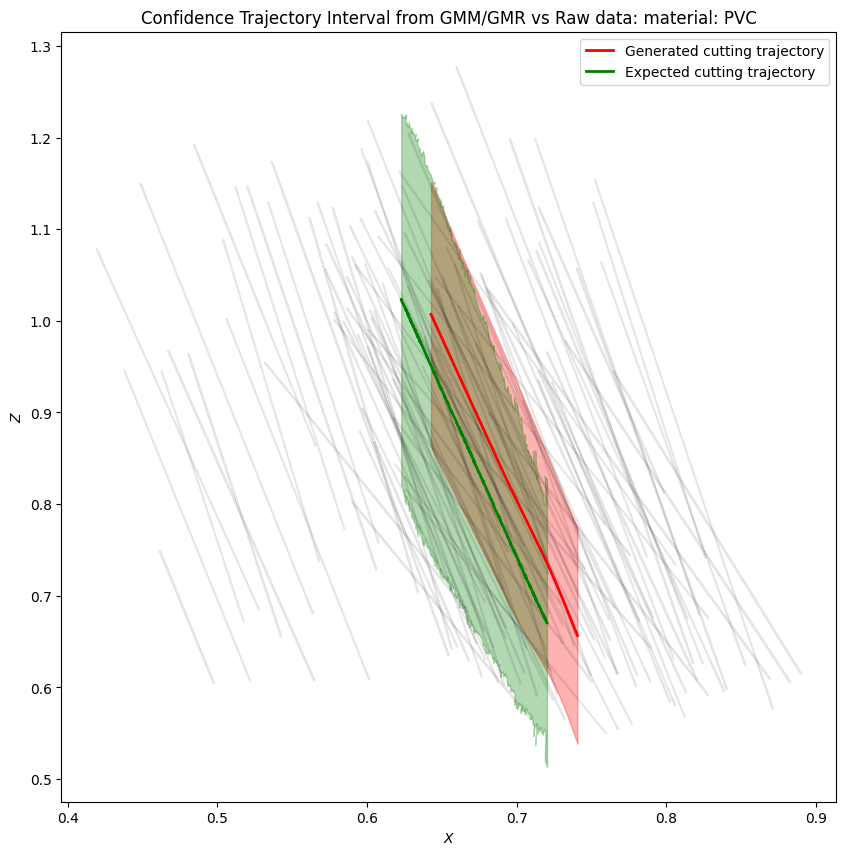

In [11]:
gmm = GMM(
    n_components=n_components,
    priors=bgmm.weights_,
    means=bgmm.means_,
    covariances=bgmm.covariances_,
    random_state=random_state)


# gmm = GMM(n_components=n_components, verbose=True).from_samples(X_train)
alpha = 0.3
x_idx, y_idx, z_idx = 1,2,3
x_pred_idx, y_pred_idx, z_pred_idx = 0,1,2
Fx_idx, Fy_idx, Fz_idx = 4,5,6
# Fx_pred_idx, Fy_pred_idx, Fz_pred_idx = 3,4,5
Fx_idx, Fy_idx, Fz_idx =7,8, 9
Tx_idx,Ty_idx,Tz_idx =10,11, 12
vx_idx, vy_idx, vz_idx = 13,14,15
Fx_pred_idx, Fy_pred_idx, Fz_pred_idx =6,7, 8
Tx_pred_idx,Ty_pred_idx,Tz_pred_idx =9,10, 11
vx_pred_idx, vy_pred_idx, vz_pred_idx = 12,13,14

steps = X[:, :, x_idx].mean(axis=0)
expected_mean = X[:, :, z_idx].mean(axis=0)
expected_std = X[:, :, z_idx].std(axis=0)

materials = {
    'crck':[1, 'Cork'],
    'peno':[2,'Penoplex'],
    'pvc':[3, 'PVC']
}

material_name = 'pvc'

labels = materials[material_name][0] * np.ones(n_steps)
plt.figure(figsize=(10, 10))
# plt.subplot(121)
plt.title(f"Confidence Trajectory Interval from GMM/GMR vs Raw data: material: {materials[material_name][1]}")

plt.plot(X[:, :, x_idx].T, X[:, :, z_idx].T, c="k", alpha=0.1)

means_over_time = []
y_stds = []

for step,l in zip(t,labels):
    conditional_gmm = gmm.condition([0,1], np.array([step, l]))
    conditional_mvn = conditional_gmm.to_mvn()
    means_over_time.append(conditional_mvn.mean)
    y_stds.append(np.sqrt(conditional_mvn.covariance[2, 2]))
    samples = conditional_gmm.sample(100)

means_over_time = np.array(means_over_time)
y_stds = np.array(y_stds)

plt.plot(means_over_time[:, x_pred_idx], means_over_time[:, z_pred_idx], c="r", lw=2, label='Generated cutting trajectory')
plt.fill_between(
    means_over_time[:, 0],
    means_over_time[:, 2] - 1.96 * y_stds,
    means_over_time[:, 2] + 1.96 * y_stds,
    color="r", alpha=alpha)

if plot_covariances:
    colors = cycle(["r", "g", "b"])
    for factor in np.linspace(0.5, 4.0, 8):
        new_gmm = GMM(
            n_components=len(gmm.means), priors=gmm.priors,
            means=gmm.means[:, 1:], covariances=gmm.covariances[:, 1:, 1:],
            random_state=gmm.random_state)
        for mean, (angle, width, height) in new_gmm.to_ellipses(factor):
            ell = Ellipse(xy=mean, width=width, height=height,
                            angle=np.degrees(angle))
            ell.set_alpha(0.15)
            ell.set_color(next(colors))
            plt.gca().add_artist(ell)

# plt.xlabel("$X$")
# plt.ylabel("$Z$")

# plt.subplot(122)
# plt.title("Confidence Interval from Raw Data")
# plt.plot(X[:, :, x_idx].T, X[:, :, z_idx].T, c="k", alpha=0.1)

plt.plot(steps, expected_mean, c="g", lw=2, label="Expected cutting trajectory")
plt.fill_between(
    steps,
    expected_mean - 1.96 * expected_std,
    expected_mean + 1.96 * expected_std,
    color="g", alpha=alpha)

plt.xlabel("$X$")
plt.ylabel("$Z$")
plt.legend()
plt.show()

In [12]:
np.save(f"predicted_pose_twist_wrench_{material_name}.npy",means_over_time)

#### Wrench

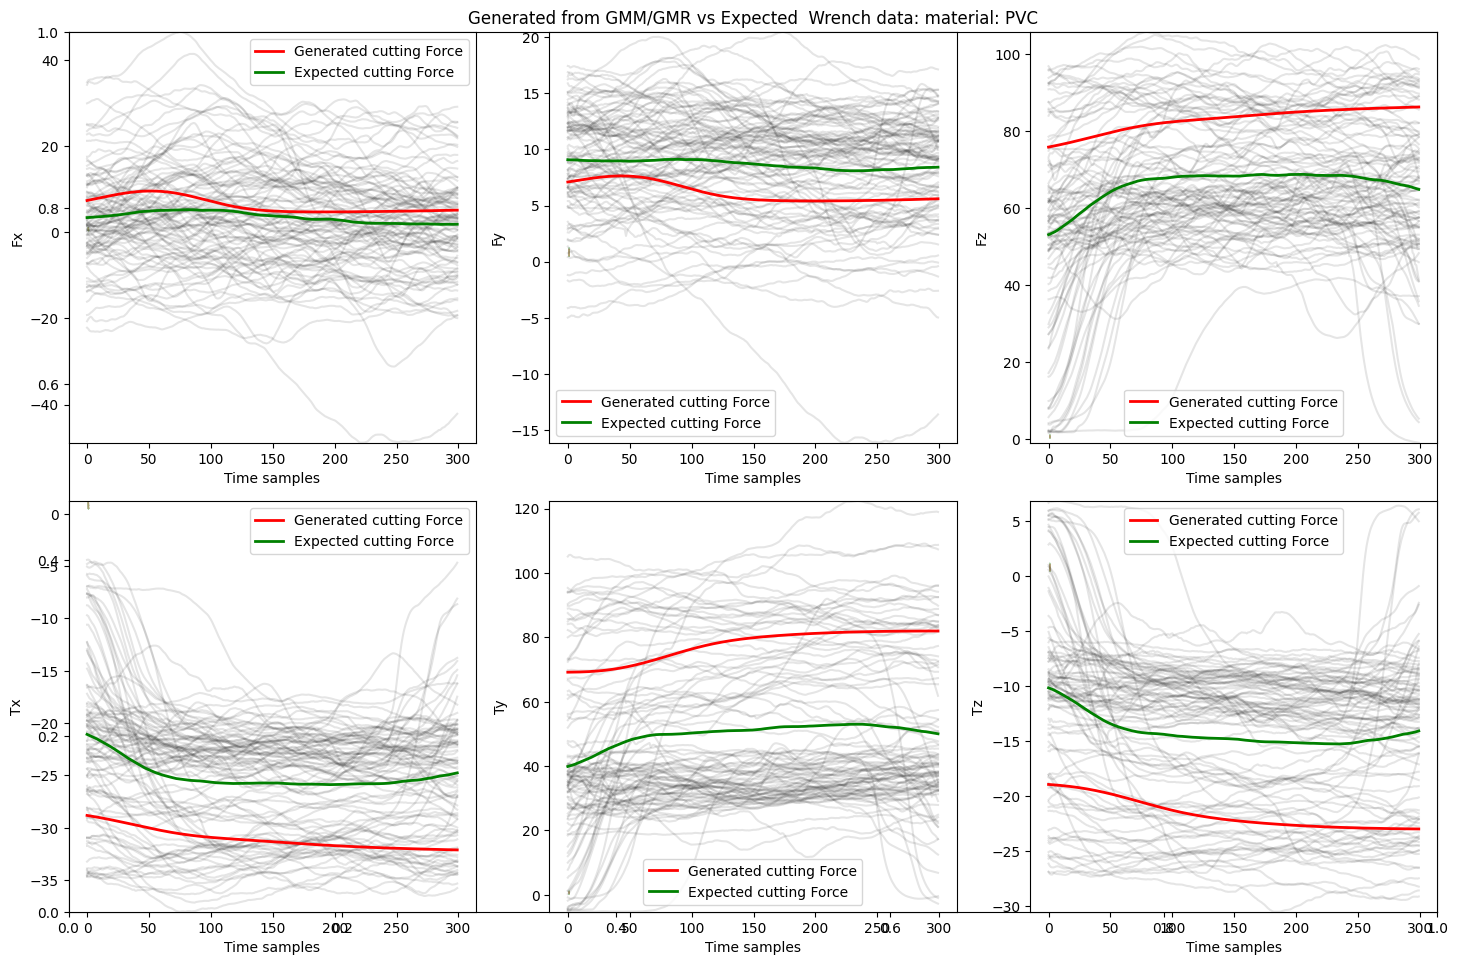

In [13]:


expected_mean_Fz = X[:, :, Fz_idx].mean(axis=0)
expected_std_Fz = X[:, :, Fz_idx].std(axis=0)
expected_mean_Fx = X[:, :, Fx_idx].mean(axis=0)
expected_std_Fx = X[:, :, Fx_idx].std(axis=0)
expected_mean_Fy = X[:, :, Fy_idx].mean(axis=0)
expected_std_Fy = X[:, :, Fy_idx].std(axis=0)
expected_mean_Tz = X[:, :, Tz_idx].mean(axis=0)
expected_std_Tz = X[:, :, Tz_idx].std(axis=0)
expected_mean_Tx = X[:, :, Tx_idx].mean(axis=0)
expected_std_Tx = X[:, :, Tx_idx].std(axis=0)
expected_mean_Ty = X[:, :, Ty_idx].mean(axis=0)
expected_std_Ty = X[:, :, Ty_idx].std(axis=0)
Forces = {
    'Fx':[Fx_idx, Fx_pred_idx, expected_mean_Fx, expected_std_Fx, 'Fx'],
    'Fy':[Fy_idx, Fy_pred_idx, expected_mean_Fy, expected_std_Fy, 'Fy'],
    'Fz':[Fz_idx, Fz_pred_idx, expected_mean_Fz, expected_std_Fz, 'Fz'],
    'Tx':[Tx_idx, Tx_pred_idx, expected_mean_Tx, expected_std_Tx, 'Tx'],
    'Ty':[Ty_idx, Ty_pred_idx, expected_mean_Ty, expected_std_Ty, 'Ty'],
    'Tz':[Tz_idx, Tz_pred_idx, expected_mean_Tz, expected_std_Tz, 'Tz']
}

plt.figure(figsize=(15, 10))
plt.title(f"Generated from GMM/GMR vs Expected  Wrench data: material: {materials[material_name][1]}")

for i,Force_axis in enumerate(Forces.keys()):
    # plt.figure(figsize=(10, 10))
    ax_id = 231+i
    plt.subplot(ax_id)
    # plt.title(f"Generated from GMM/GMR vs Raw  Force data: material: {materials[material_name][1]}")

    plt.plot(X[:, :, Forces[Force_axis][0]].T, c="k", alpha=0.1)

    plt.plot(means_over_time[:, Forces[Force_axis][1]], c="r", lw=2, label='Generated cutting Force')
    plt.fill_between(
        means_over_time[:, 0],
        means_over_time[:, 2] - 1.96 * y_stds,
        means_over_time[:, 2] + 1.96 * y_stds,
        color="r", alpha=alpha)

    plt.plot(Forces[Force_axis][2], c="g", lw=2, label="Expected cutting Force")
    plt.fill_between(
        steps,
        expected_mean - 1.96 * expected_std,
        expected_mean + 1.96 * expected_std,
        color="g", alpha=alpha)
    # plt.ylim(50, 160)
    plt.autoscale(enable=True, axis='y', tight=True)
    plt.xlabel('Time samples')
    plt.ylabel(f"{Forces[Force_axis][-1]}")
    plt.legend()
plt.tight_layout()
plt.show()

#### Twist

### Metrics

In [14]:
expected_mean_vx = X[:, :, vx_idx].mean(axis=0)
expected_std_vx = X[:, :, vx_idx].std(axis=0)
expected_mean_vy = X[:, :, vy_idx].mean(axis=0)
expected_std_vy = X[:, :, vy_idx].std(axis=0)
expected_mean_vz = X[:, :, vz_idx].mean(axis=0)
expected_std_vz = X[:, :, vz_idx].std(axis=0)
expected_mean_x = X[:, :, x_idx].mean(axis=0)
expected_std_x = X[:, :, x_idx].std(axis=0)
expected_mean_y = X[:, :, y_idx].mean(axis=0)
expected_std_y = X[:, :, y_idx].std(axis=0)
expected_mean_z = X[:, :, z_idx].mean(axis=0)
expected_std_z = X[:, :, z_idx].std(axis=0)
from sklearn.metrics import mean_squared_error
expected_mean_power_x = expected_mean_Fx * expected_mean_vx
predicted_mean_power_x = means_over_time[:,Fx_pred_idx] * means_over_time[:,vx_pred_idx]
expected_mean_power_y = expected_mean_Fy * expected_mean_vy
predicted_mean_power_y = means_over_time[:,Fy_pred_idx] * means_over_time[:,vy_pred_idx]
expected_mean_power_z = expected_mean_Fz * expected_mean_vz
predicted_mean_power_z = means_over_time[:,Fz_pred_idx] * means_over_time[:,vz_pred_idx]
rmse_Px = mean_squared_error(expected_mean_power_x, predicted_mean_power_x, squared=False)/(max(expected_mean_power_x) - min(expected_mean_power_x))
rmse_Py = mean_squared_error(expected_mean_power_y, predicted_mean_power_y, squared=False)/(max(expected_mean_power_y) - min(expected_mean_power_y))
rmse_Pz = mean_squared_error(expected_mean_power_z, predicted_mean_power_z, squared=False)/(max(expected_mean_power_z) - min(expected_mean_power_z))
rmse_x = mean_squared_error(expected_mean_x, means_over_time[:,x_pred_idx], squared=False)
rmse_y = mean_squared_error(expected_mean_x, means_over_time[:,y_pred_idx], squared=False)
rmse_z = mean_squared_error(expected_mean_x, means_over_time[:,z_pred_idx], squared=False)
rmse_vx = mean_squared_error(expected_mean_vx, means_over_time[:, vx_pred_idx], squared=False)
rmse_vy = mean_squared_error(expected_mean_vy, means_over_time[:, vy_pred_idx], squared=False)
rmse_vz = mean_squared_error(expected_mean_vz, means_over_time[:, vz_pred_idx], squared=False)
rmse_Fx = mean_squared_error(expected_mean_Fx, means_over_time[:, Fx_pred_idx], squared=False)/(max(expected_mean_Fx) - min(expected_mean_Fx))
rmse_Fy = mean_squared_error(expected_mean_Fy, means_over_time[:, Fy_pred_idx], squared=False)/(max(expected_mean_Fy) - min(expected_mean_Fy))
rmse_Fz = mean_squared_error(expected_mean_Fz, means_over_time[:, Fz_pred_idx], squared=False)/(max(expected_mean_Fz)-min(expected_mean_Fz))
# print(rmse_Px)
# print(rmse_Py)
# print(rmse_Pz)
rmse_twist = np.mean([rmse_vx, rmse_vy, rmse_vz])
rmse_wrench = np.mean([rmse_Fx, rmse_Fy, rmse_Fz])
rmse_trajectory = np.mean([rmse_x, rmse_y, rmse_z])
rmse_power = np.mean([rmse_Px, rmse_Py, rmse_Pz])
print(f'Trajectory rmse = {rmse_trajectory}')
print(f'Twist rmse = {rmse_twist}')
print(f'Wrench rmse = {rmse_wrench}')
print(f"Power rmse {rmse_power}")

Trajectory rmse = 0.10181300945829991
Twist rmse = 0.07094628031322141
Wrench rmse = 1.4884162752410635
Power rmse 0.14483280123045747


d:\PhD\GMR Analysis\gmr_venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\PhD\GMR Analysis\gmr_venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\PhD\GMR Analysis\gmr_venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\PhD\GMR Analysis\gmr_venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared